# **Hierarchial clustering**

importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

setting max rows and max columns in pandas

In [19]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [20]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


info of dataset

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No missing values in dataset and one categorical variable i.e genre

Removing unneccesary variables

In [22]:
dataset.drop(columns=['CustomerID','Genre'],inplace=True)

In [23]:
x=dataset.iloc[:,1:3].values

Using dendogram for finding optimal number of clusters

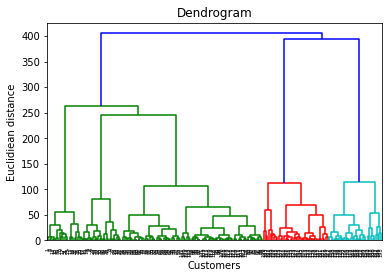

In [24]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidiean distance')
plt.show()

optimal number of clusters is found by finding largest euclidien distance which do not pass any horizontal line i.e 3rd green line from left to right and draw a horizantal line passing through it,then no of intersection points gives us optimal number of clusters.here we got 5 clusters

Training the hierarchial clustering model on the dataset

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

Visualizing the clusters

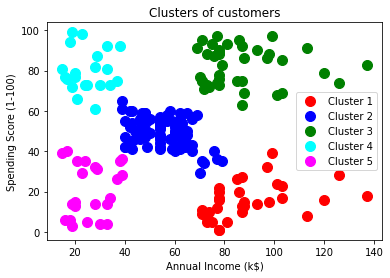

In [26]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In hierarchial clustering clusters are made by joining two closest points first and making them as one cluster next finding two closest clusters and making them one this process is repeated till we got one large cluster and finding optimal number of clusters using dendrogram as above